In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from  datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display
import os

warnings.filterwarnings('ignore')
pd.options.display.float_format='{:,.1f}'.format
%matplotlib inline
plotsize=(13,5) 

In [2]:
df=pd.read_excel('D:\TimeSeries\Sample - Superstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,262.0,2,0.0,41.9
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9,3,0.0,219.6
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6,2,0.0,6.9
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.6,5,0.5,-383.0
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.4,2,0.2,2.5


In [3]:
variables=['Order Date','Category','Sales']
group_variables=variables[:2]
outcome_variables=variables[2]
base=df.groupby(group_variables,as_index=False)[outcome_variables].sum()

In [4]:
base

,Order Date,Category,Sales
0,2011-01-04,Office Supplies,16.4
1,2011-01-05,Office Supplies,288.1
2,2011-01-06,Office Supplies,19.5
3,2011-01-07,Furniture,"2,573.8"
4,2011-01-07,Office Supplies,685.3
...,...,...,...
2859,2014-12-30,Office Supplies,282.4
2860,2014-12-30,Technology,302.4
2861,2014-12-31,Furniture,323.1
2862,2014-12-31,Office Supplies,299.7


In [5]:
for x in base.columns:
    print(x,type(base[x]),base[x].dtype)

Order Date <class 'pandas.core.series.Series'> datetime64[ns]
Category <class 'pandas.core.series.Series'> object
Sales <class 'pandas.core.series.Series'> float64


In [6]:
order_date=np.array(base['Order Date'])
category=np.array(base['Category'])
sales=np.array(base['Sales'])

In [7]:
df_from_numpy=pd.DataFrame({'Order Date':order_date,'Category':category,'Sales':sales})

In [8]:
df_from_numpy.dtypes

Order Date    datetime64[ns]
Category              object
Sales                float64
dtype: object

In [9]:
order_date

array(['2011-01-04T00:00:00.000000000', '2011-01-05T00:00:00.000000000',
       '2011-01-06T00:00:00.000000000', ...,
       '2014-12-31T00:00:00.000000000', '2014-12-31T00:00:00.000000000',
       '2014-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [10]:
order_date_daily=np.array(order_date,dtype='datetime64[D]')
order_date_daily

array(['2011-01-04', '2011-01-05', '2011-01-06', ..., '2014-12-31',
       '2014-12-31', '2014-12-31'], dtype='datetime64[D]')

In [11]:
order_date_monthly=np.array(order_date,dtype='datetime64[M]')
order_date_monthly

array(['2011-01', '2011-01', '2011-01', ..., '2014-12', '2014-12',
       '2014-12'], dtype='datetime64[M]')

In [12]:
len(np.unique(order_date_monthly))

48

In [13]:
len(np.unique(order_date))

1238

In [14]:
base.set_index('Order Date',inplace=True)


In [15]:
base

,Category,Sales
Order Date,,
2011-01-04,Office Supplies,16.4
2011-01-05,Office Supplies,288.1
2011-01-06,Office Supplies,19.5
2011-01-07,Furniture,"2,573.8"
2011-01-07,Office Supplies,685.3
...,...,...
2014-12-30,Office Supplies,282.4
2014-12-30,Technology,302.4
2014-12-31,Furniture,323.1


In [16]:
base['2011'].head()

,Category,Sales
Order Date,,
2011-01-04,Office Supplies,16.4
2011-01-05,Office Supplies,288.1
2011-01-06,Office Supplies,19.5
2011-01-07,Furniture,"2,573.8"
2011-01-07,Office Supplies,685.3


In [17]:
print('Day',base.index.day,'\n')
print('Week',base.index.week,'\n')
base['DayOfWeek']=base.index.dayofweek
print(base.head())
 

Day Int64Index([ 4,  5,  6,  7,  7,  7,  8,  8, 10, 10,
            ...
            28, 29, 29, 29, 30, 30, 30, 31, 31, 31],
           dtype='int64', name='Order Date', length=2864) 

Week Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
            ...
            52,  1,  1,  1,  1,  1,  1,  1,  1,  1],
           dtype='int64', name='Order Date', length=2864) 

                   Category   Sales  DayOfWeek
Order Date                                    
2011-01-04  Office Supplies    16.4          1
2011-01-05  Office Supplies   288.1          2
2011-01-06  Office Supplies    19.5          3
2011-01-07        Furniture 2,573.8          4
2011-01-07  Office Supplies   685.3          4


In [18]:
del(base['DayOfWeek'])

No duplicate index values
No missing Values

In [19]:
base.reset_index(inplace=True)
sales_pivot=base.pivot(index='Order Date',columns='Category',values='Sales')
sales_pivot.head()

Category,Furniture,Office Supplies,Technology
Order Date,,,
2011-01-04,NaN,16.4,NaN
2011-01-05,NaN,288.1,NaN
2011-01-06,NaN,19.5,NaN
2011-01-07,"2,573.8",685.3,"1,147.9"
2011-01-08,76.7,10.4,NaN


In [20]:
sales=base.set_index(['Order Date','Category']).unstack('Category').fillna(0)

In [21]:
sales

Sales                           
Category   Furniture Office Supplies Technology
Order Date                                     
2011-01-04       0.0            16.4        0.0
2011-01-05       0.0           288.1        0.0
2011-01-06       0.0            19.5        0.0
2011-01-07   2,573.8           685.3    1,147.9
2011-01-08      76.7            10.4        0.0
...              ...             ...        ...
2014-12-27       0.0           814.6        0.0
2014-12-28       0.0            13.2      164.4
2014-12-29     551.3         1,091.2       14.9
2014-12-30   2,330.7           282.4      302.4
2014-12-31     323.1           299.7       90.9

[1238 rows x 3 columns]

In [22]:
print('Unique dated in our data',len(sales.index.unique()),'Days')
our_date_range=sales.index.max()-sales.index.min()

print('Total days in our date range ',our_date_range.days,'Days')

Unique dated in our data 1238 Days
Total days in our date range  1457 Days


In [23]:
new_index=pd.date_range(sales.index.min(),sales.index.max())

In [24]:
new_index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1458, freq='D')

In [25]:
sales_new=sales.reindex(new_index,fill_value=0)

In [26]:
sales_new.head()

Sales                           
Category   Furniture Office Supplies Technology
2011-01-04       0.0            16.4        0.0
2011-01-05       0.0           288.1        0.0
2011-01-06       0.0            19.5        0.0
2011-01-07   2,573.8           685.3    1,147.9
2011-01-08      76.7            10.4        0.0

Resampling


In [27]:
sales_weekly=sales_new.resample('W').sum()
print('Weekly Sales')
print(sales_weekly.head())

Weekly Sales
               Sales                           
Category   Furniture Office Supplies Technology
2011-01-09   2,650.5         1,019.8    1,147.9
2011-01-16   1,003.8         2,039.4      827.9
2011-01-23   1,747.3           871.1      824.1
2011-01-30     550.2           680.3      343.3
2011-02-06     290.7           502.7      649.9


In [28]:
sales_monthly=sales_new.resample('M').sum()
print('sales_monthly')
print(sales_monthly.head())

sales_monthly
               Sales                           
Category   Furniture Office Supplies Technology
2011-01-31   5,951.9         4,851.1    3,143.3
2011-02-28   2,130.3         1,071.7    1,608.5
2011-03-31  14,574.0         8,605.9   32,511.2
2011-04-30   7,944.8        11,155.1    9,195.4
2011-05-31   6,912.8         7,135.6    9,599.9


In [29]:
sales_quarterly=sales_new.resample('Q').sum()
print('sales_quarterly')
print(sales_quarterly.head())

sales_quarterly
               Sales                           
Category   Furniture Office Supplies Technology
2011-03-31  22,656.1        14,528.7   37,263.0
2011-06-30  28,063.7        31,243.7   27,231.3
2011-09-30  41,957.9        53,924.0   47,751.4
2011-12-31  64,515.1        52,080.0   63,032.6
2012-03-31  27,374.1        23,059.4   18,418.2


In [30]:
sales_annual=sales_new.resample('Y').sum()
print('Annual Sales')
print(sales_annual.head())

Annual Sales
               Sales                           
Category   Furniture Office Supplies Technology
2011-12-31 157,192.9       151,776.4  175,278.2
2012-12-31 170,518.2       137,233.5  162,780.8
2013-12-31 198,901.4       183,510.6  226,061.8
2014-12-31 215,387.3       246,526.6  272,033.2


In [32]:
#note that downsampling (from annual to monthly for example) prduce missing values
sales_monthly_from_annual=sales_annual.resample('M')
print(sales_monthly_from_annual.interpolate(method='spline',order=3).head())

               Sales                           
Category   Furniture Office Supplies Technology
2011-12-31 157,192.9       151,776.4  175,278.2
2012-01-31 157,062.6       147,084.7  168,957.8
2012-02-29 157,200.9       143,355.5  164,096.2
2012-03-31 157,611.1       140,049.0  159,969.0
2012-04-30 158,251.0       137,493.3  156,975.1


In [33]:
sales_daily=sales.asfreq('D')
sales_businessday=sales.asfreq('B')
sales_hourly=sales.asfreq('h')
sales_hourly.head()

Sales                           
Category            Furniture Office Supplies Technology
Order Date                                              
2011-01-04 00:00:00       0.0            16.4        0.0
2011-01-04 01:00:00       NaN             NaN        NaN
2011-01-04 02:00:00       NaN             NaN        NaN
2011-01-04 03:00:00       NaN             NaN        NaN
2011-01-04 04:00:00       NaN             NaN        NaN

Variable transformations

In [34]:
#variable first differnece
print('Mionthly sales , first difference \n', sales_monthly.diff().head())
#variable percent change
print('\n Monthly sales change \n', sales_monthly.pct_change().head())
#log sales
print('\n log(1+mothly sales)\n ',np.log(1+sales_monthly.head()))

#addd & change to original data
sales_monthly.join(sales_monthly.pct_change().add_suffix('_%_change')).head()

Mionthly sales , first difference 
                Sales                           
Category   Furniture Office Supplies Technology
2011-01-31       NaN             NaN        NaN
2011-02-28  -3,821.5        -3,779.4   -1,534.8
2011-03-31  12,443.6         7,534.2   30,902.7
2011-04-30  -6,629.1         2,549.2  -23,315.7
2011-05-31  -1,032.0        -4,019.5      404.4

 Monthly sales change 
                Sales                           
Category   Furniture Office Supplies Technology
2011-01-31       NaN             NaN        NaN
2011-02-28      -0.6            -0.8       -0.5
2011-03-31       5.8             7.0       19.2
2011-04-30      -0.5             0.3       -0.7
2011-05-31      -0.1            -0.4        0.0

 log(1+mothly sales)
                 Sales                           
Category   Furniture Office Supplies Technology
2011-01-31       8.7             8.5        8.1
2011-02-28       7.7             7.0        7.4
2011-03-31       9.6             9.1       10.4
201

Sales                                Sales_%_change  \
Category   Furniture Office Supplies Technology Furniture_%_change   
2011-01-31   5,951.9         4,851.1    3,143.3                NaN   
2011-02-28   2,130.3         1,071.7    1,608.5               -0.6   
2011-03-31  14,574.0         8,605.9   32,511.2                5.8   
2011-04-30   7,944.8        11,155.1    9,195.4               -0.5   
2011-05-31   6,912.8         7,135.6    9,599.9               -0.1   

                                                         
Category   Office Supplies_%_change Technology_%_change  
2011-01-31                      NaN                 NaN  
2011-02-28                     -0.8                -0.5  
2011-03-31                      7.0                19.2  
2011-04-30                      0.3                -0.7  
2011-05-31                     -0.4                 0.0

Rolling Averages and Windows

In [35]:
window_size=7
rolling_window=sales_new.rolling(window_size)
print('rolling_window')
print(rolling_window.mean().dropna().head())
print('\nRolling st. Dev')
print(rolling_window.std().dropna().head())
print('\nCumulative Sales')
print(sales_new.cumsum().dropna().head())

rolling_window
               Sales                           
Category   Furniture Office Supplies Technology
2011-01-10     378.6           147.0      168.4
2011-01-11     386.1           145.1      168.4
2011-01-12     387.5           103.9      168.4
2011-01-13     387.5           101.1      168.4
2011-01-14     145.5           292.8       96.8

Rolling st. Dev
               Sales                           
Category   Furniture Office Supplies Technology
2011-01-10     968.4           258.9      432.1
2011-01-11     965.2           260.1      432.1
2011-01-12     964.6           256.5      432.1
2011-01-13     964.6           257.6      432.1
2011-01-14     325.3           764.8      242.8

Cumulative Sales
               Sales                           
Category   Furniture Office Supplies Technology
2011-01-04       0.0            16.4        0.0
2011-01-05       0.0           304.5        0.0
2011-01-06       0.0           324.0        0.0
2011-01-07   2,573.8         1,009.4  

Visualization

<AxesSubplot:title={'center':'Weekly Sales'}>

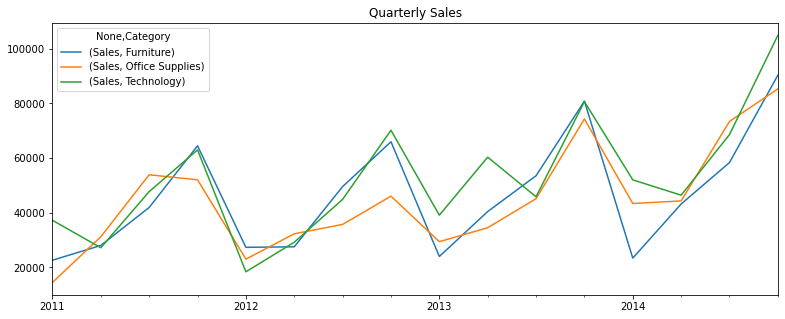

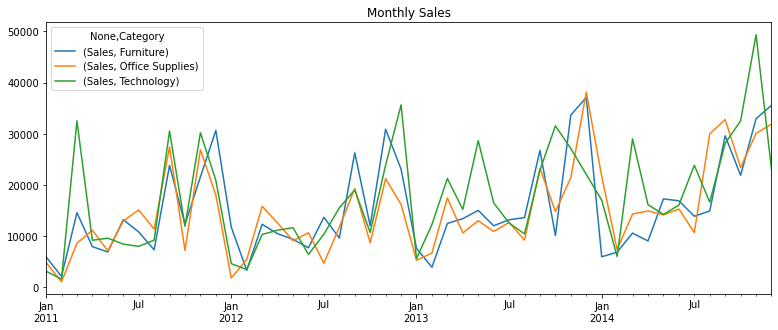

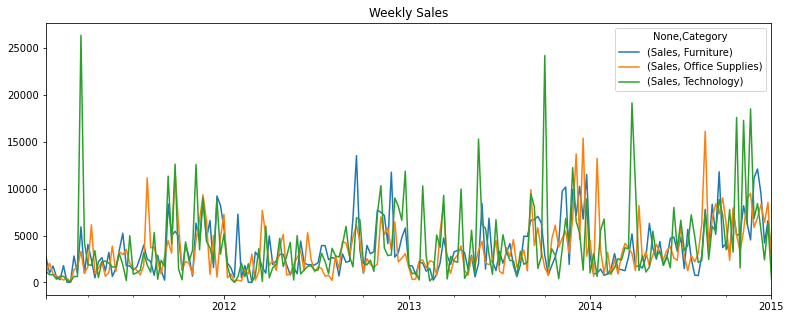

In [36]:
sales_quarterly.plot(figsize=plotsize,title='Quarterly Sales')
sales_monthly.plot(figsize=plotsize,title='Monthly Sales')
sales_weekly.plot(figsize=plotsize,title='Weekly Sales')

<AxesSubplot:title={'center':'Quarterly Sales & Change'}>

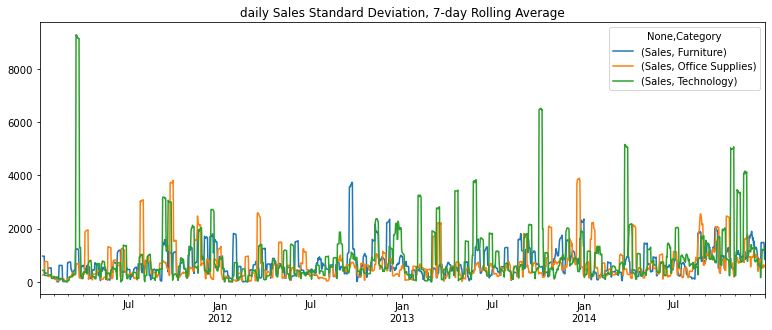

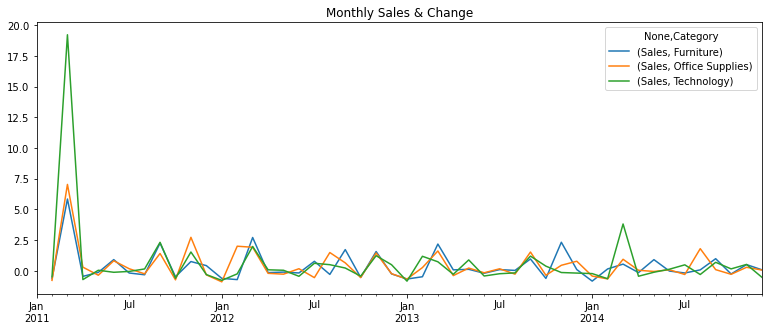

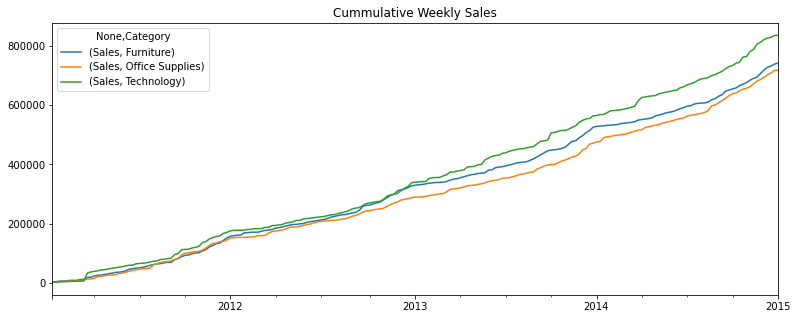

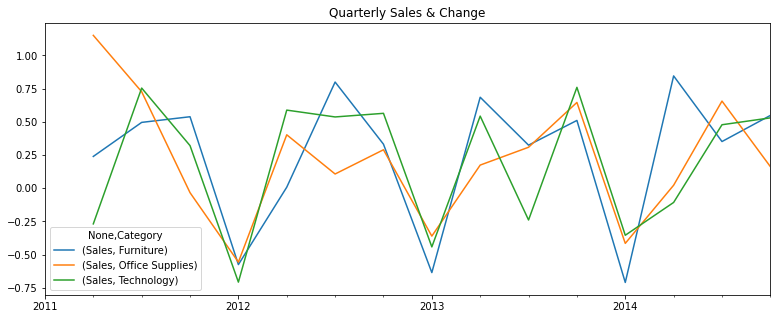

In [38]:
rolling_window.std().plot(figsize=plotsize,title='daily Sales Standard Deviation, 7-day Rolling Average')

sales_monthly.pct_change().plot(figsize=plotsize,title='Monthly Sales & Change')

sales_weekly.cumsum().plot(figsize=plotsize,title='Cummulative Weekly Sales')

sales_quarterly.pct_change().plot(figsize=plotsize,title='Quarterly Sales & Change')


Time Srries Visulaization

Daily data Autocorrelation Plots


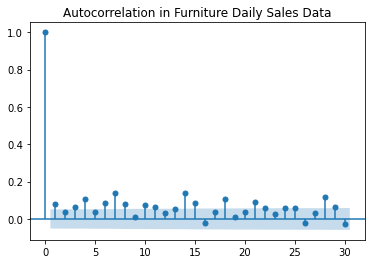

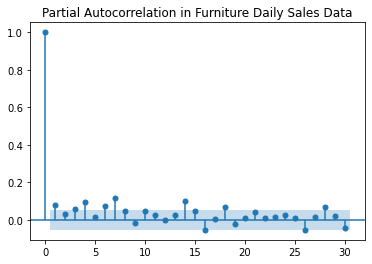

In [41]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,month_plot,quarter_plot

print('Daily data Autocorrelation Plots')

acf_plot=plot_acf(sales_new['Sales']['Furniture'],lags=30,title='Autocorrelation in Furniture Daily Sales Data')

pacf_plot=plot_pacf(sales_new['Sales']['Furniture'],lags=30,title='Partial Autocorrelation in Furniture Daily Sales Data')



 Monyhly data seasonal plot


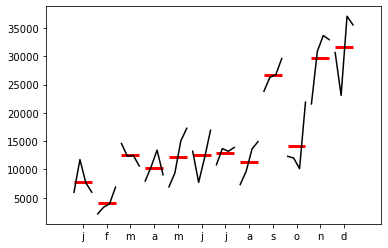

In [43]:
print('\n Monyhly data seasonal plot')
m_plot=month_plot(sales_monthly['Sales']['Furniture'])


 Quartely Data Serasonal plot


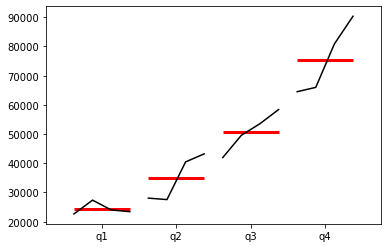

In [46]:
print('\n Quartely Data Serasonal plot')
plot_quar=quarter_plot(sales_quarterly['Sales']['Furniture'])